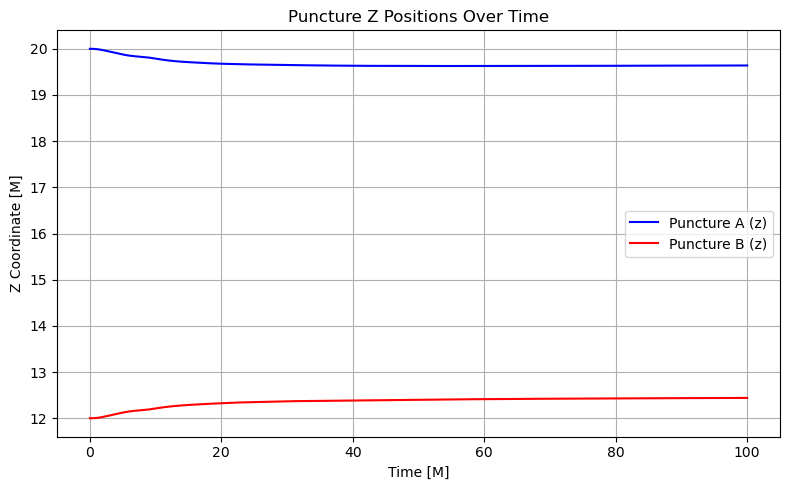

In [4]:
# Plot puncture z-position over time (absolute coordinates)
# for previous head-on binary BH simulation

import numpy as np
import matplotlib.pyplot as plt

# Load data (absolute coordinates)
data = np.loadtxt("data/punctures.dat")

# Extract time and z positions (no center offset needed)
t  = data[:, 0]
z1 = data[:, 3]  # Puncture A z
z2 = data[:, 6]  # Puncture B z

# Plot
plt.figure(figsize=(8, 5))
plt.plot(t, z1, label='Puncture A (z)', color='blue')
plt.plot(t, z2, label='Puncture B (z)', color='red')
plt.xlabel('Time [M]')
plt.ylabel('Z Coordinate [M]')
plt.title('Puncture Z Positions Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("PunctureZTrack.png")
plt.show()

In [ ]:
# Plot extracted GW signal (Re(Psi4)) over time for l=2, m=0 mode

import numpy as np
import matplotlib.pyplot as plt

# Extraction radii (from your params)
R0 = 16.0
R1 = 32.0

# Total ADM mass (massA + massB)
M = 1.0

# Mode
mode = "20"

# Load waveform data (from data directory)
data = np.loadtxt("data/Weyl_integral_" + mode + ".dat")

# Apply tortoise coordinate shift
r0 = R0 + M * np.log(R0 / (2.0 * M) - 1.0)
r1 = R1 + M * np.log(R1 / (2.0 * M) - 1.0)

# Shift time coordinates and normalize by mass
t0 = (data[:,0] - r0) / M
psi4_r0 = data[:,1]

t1 = (data[:,0] - r1) / M
psi4_r1 = data[:,3]

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(t0, psi4_r0, ':', lw=0.8, label=f"r = {R0}")
plt.plot(t1, psi4_r1, '-', lw=1.0, label=f"r = {R1}")
plt.xlabel("Time [t / M]")
plt.ylabel("Re(Psi₄) for (l, m) = (2, 0)")
plt.title("Gravitational Waveform: Weyl4 (Real Part)")
plt.grid(True)
plt.legend()

# Adjust axis limits if needed
plt.xlim(0, 400)          # or you can use plt.xlim(t0.min(), t0.max())
plt.ylim(-0.05, 0.05)     # can be adjusted based on actual waveform strength

# Save figure
plt.tight_layout()
plt.savefig("Weyl_20.png")
plt.show()